In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import animation
from matplotlib.animation import PillowWriter
import constants

In [38]:
df = pd.read_csv("rank_by_week.csv", index_col=0)
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
NJNY,1,7,8,10,10,5,7,8,10,8,9,9,11,11,12,12,12
POR,2,2,3,7,8,4,3,2,3,3,2,2,1,1,1,4,2
LA,3,6,2,2,2,7,4,6,6,5,7,7,7,7,7,7,7
CHI,4,4,6,6,7,3,2,3,2,2,3,4,4,6,6,6,6
WAS,5,3,7,8,9,10,8,7,9,11,11,10,10,10,11,11,10
SD,6,1,1,1,1,1,1,1,1,1,1,1,2,3,2,1,3
NC,7,11,12,12,12,12,12,12,12,12,12,12,12,12,10,9,8
RGN,8,10,10,9,3,6,6,5,4,4,6,5,6,5,5,5,5
LOU,9,9,9,3,5,8,9,9,8,10,10,11,9,9,9,10,11
HOU,10,5,4,4,4,2,5,4,5,6,4,3,3,2,3,2,4


In [39]:
# Add extra columns as backdrop for team names
week = 17
extra = 4
for i in range(1, extra + 1):
    df[str(week + i)] = df[str(week)]

In [40]:
# Sort so top teams have lines drawn on top
df = df.sort_values(by=[str(week)], ascending=False)

<IPython.core.display.Javascript object>


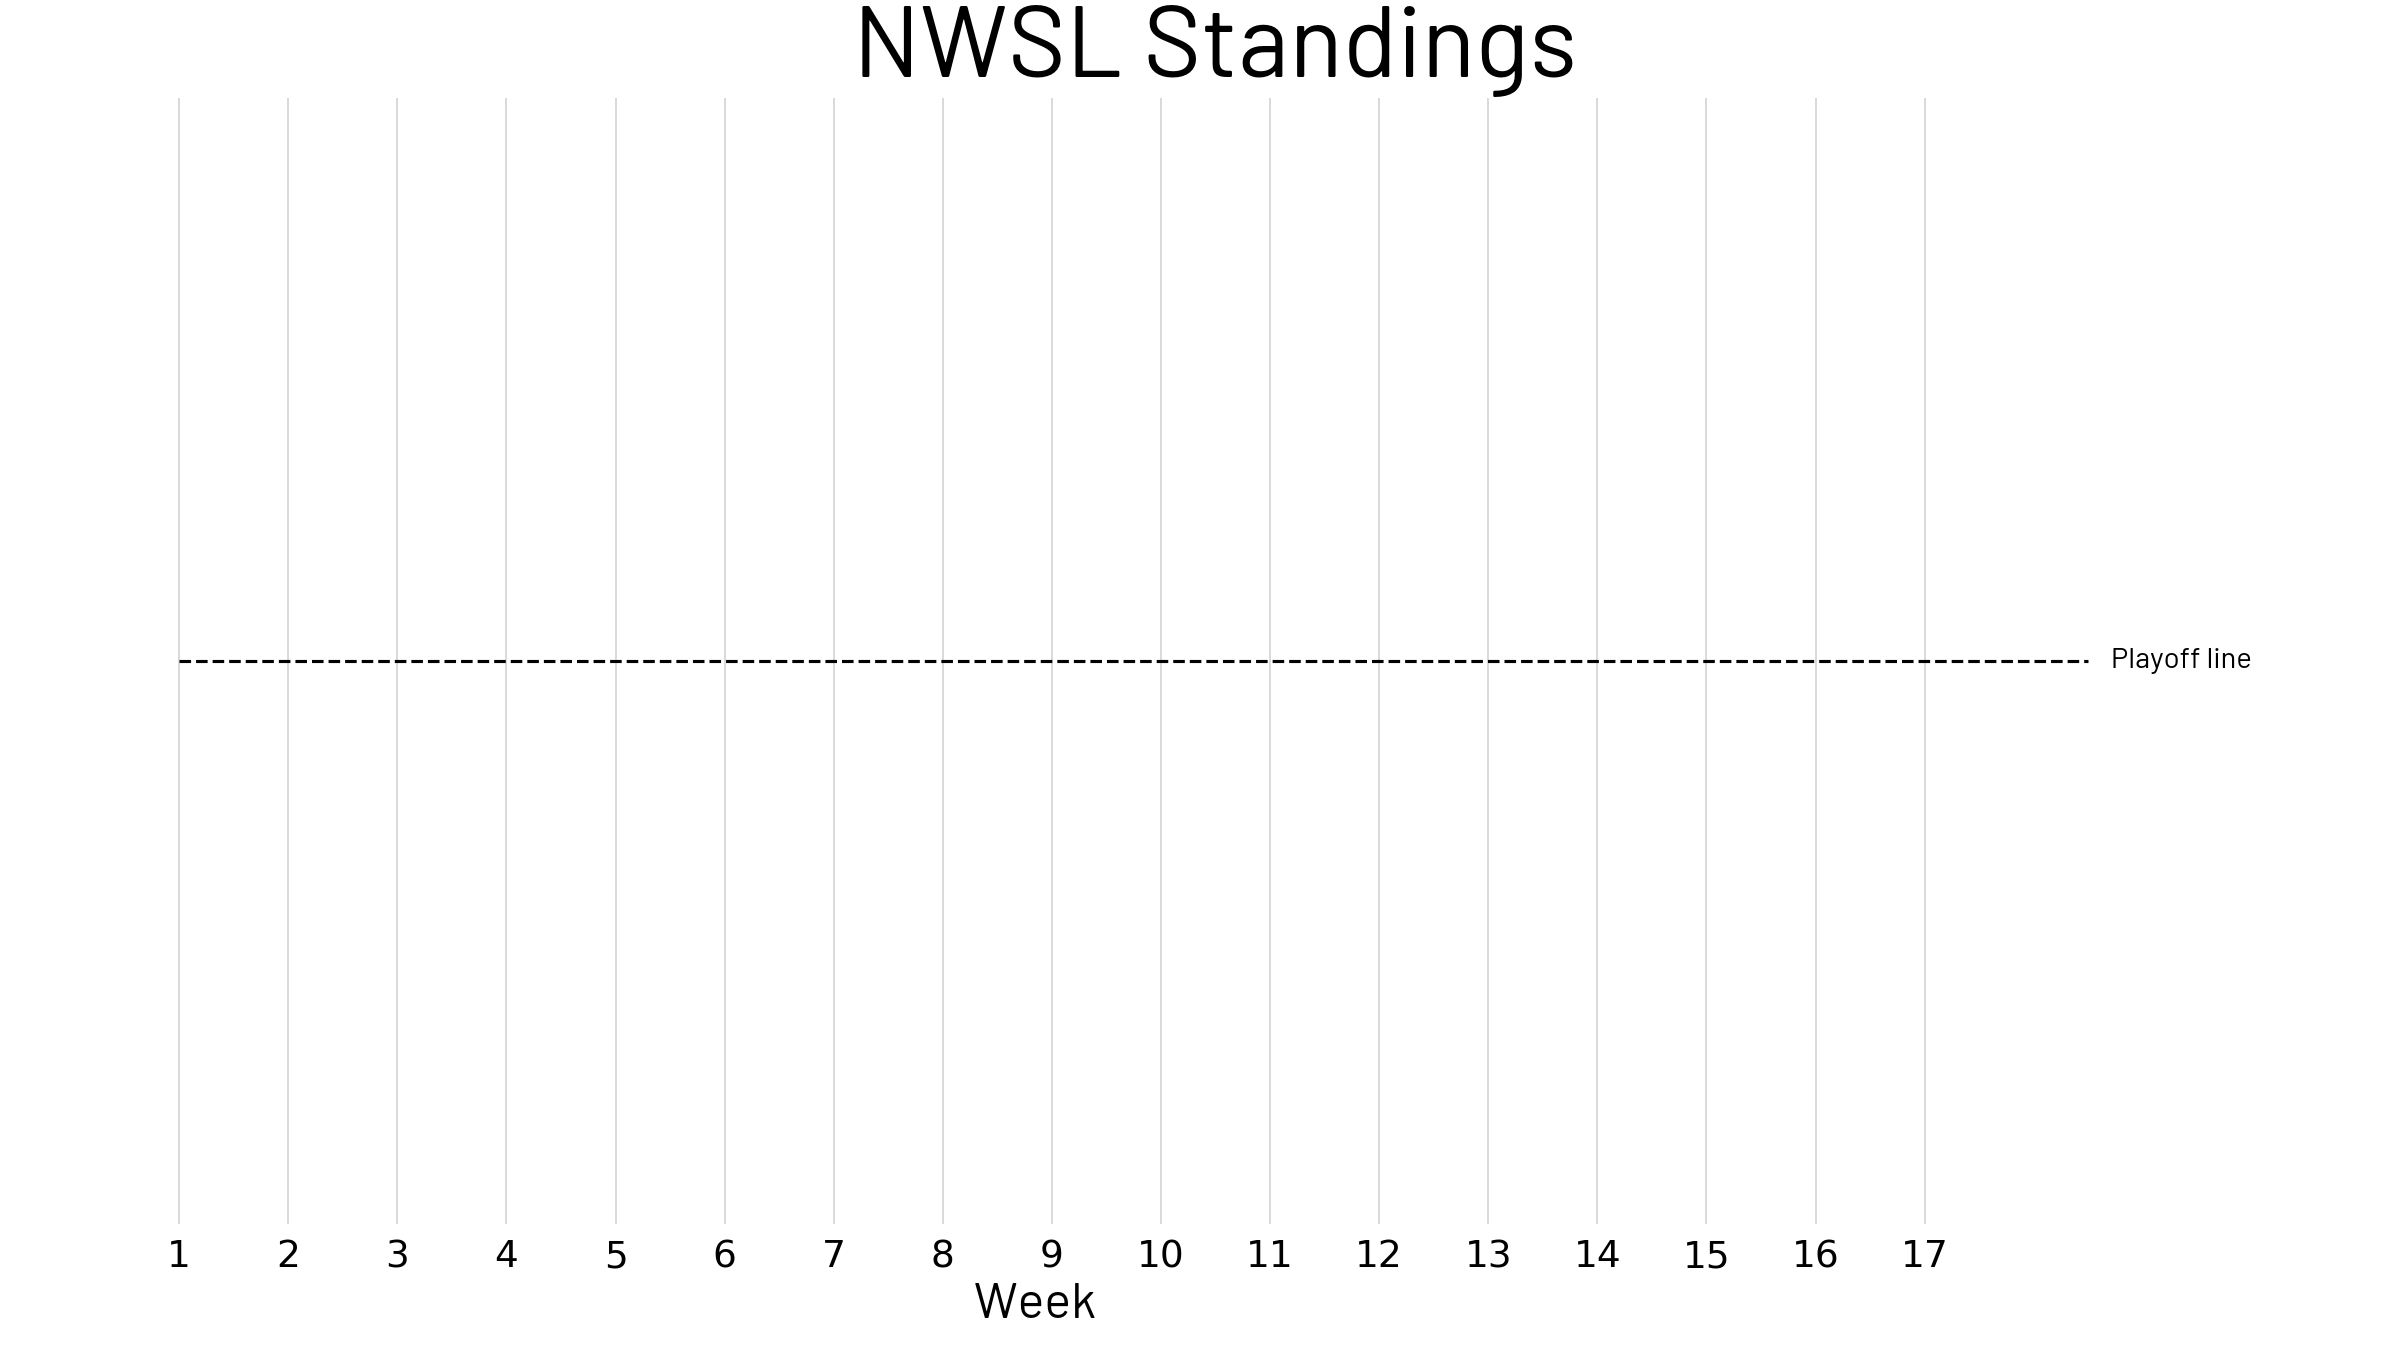

In [42]:
%matplotlib notebook

barlow = fm.FontProperties(fname="/home/agale/nwsl-analytics/nwsl-rank/Barlow.otf")
fig, ax = plt.subplots(figsize=(16, 9))
fig.tight_layout(rect=[0, 0.05, 1, 0.95])

step = 0.5

def animate(i):
    if int(i * step) + 1 >= len(df.columns):
        return
    ax.cla()  # clear the previous image

    ax.set_xlim([0, len(df.columns)])  # fix the x axis
    ax.set_ylim([0.5, len(df.index)+0.5])  # fix the y axis

    # Title
    plt.title("NWSL Standings", fontproperties=barlow, size=48, pad=10)

    # General
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)

    # y-axis
    fig.gca().invert_yaxis()
    ax.set_yticks([])
    ax.yaxis.grid(False)

    # x-axis
    ax.set_xticks(range(1, week + 1))
    ax.xaxis.grid(True, color="lightgray")
    ax.tick_params(axis="x", which="major", labelsize=18)
    plt.xlabel("Week" + " " * 36, fontproperties=barlow, size=24)

    # Playoff line
    plt.hlines(y=6.5, xmin=1, xmax=week + 1.5, linestyle="--", color="black")
    ax.text(
        week + extra - 1,
        6.5,
        "Playoff line",
        color="black",
        fontsize=14,
        fontproperties=barlow,
        va="center",
        ha="right",
    )

    for team in df.index:
        x = df.columns[: int(i * step) + 1].astype(int)
        y = df.loc[team][: int(i * step) + 1].astype(float)

        if i % 4 > 0 and int(i * step) + 1 < len(df.loc[team]) - 1:
            x = x.append(pd.Index([i * step + 1]))
            prv = float(df.loc[team][int(i * step)])
            nxt = float(df.loc[team][int(i * step) + 1])
            frac = step * i - int(step * i)
            y = y.append(pd.Series([prv * (1.0 - frac) + nxt * frac]))
        ax.plot(
            x,
            y,
            linewidth=28,
            color=constants.colors[team],
            alpha=0.9,
            solid_capstyle="round",
        )
        if (i * step) + 1 >= week + extra - 1:
            ax.text(
                week + extra - 1,
                df.at[team, str(week)],
                constants.teams[team] + " " + str(df.at[team, str(week)]),
                color=constants.text[team],
                fontsize=18,
                fontproperties=barlow,
                fontweight="bold",
                va="center",
                ha="right",
            )


anim = animation.FuncAnimation(
    fig, animate, frames=int(70 / step), interval=1, blit=False
)

anim.save("week" + str(week) + ".gif", writer=PillowWriter(fps=20))